In [1]:
"""

https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras

from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
"""

"\n\nhttps://www.kaggle.com/amarjeet007/visualize-cnn-with-keras\n\nfrom keras.models import Model\nlayer_outputs = [layer.output for layer in model.layers]\nactivation_model = Model(inputs=model.input, outputs=layer_outputs)\nactivations = activation_model.predict(X_train[10].reshape(1,28,28,1))\n \ndef display_activation(activations, col_size, row_size, act_index): \n    activation = activations[act_index]\n    activation_index=0\n    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))\n    for row in range(0,row_size):\n        for col in range(0,col_size):\n            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')\n            activation_index += 1\n"

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

#CNN Layers
from keras.layers import Conv2D,Activation,Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization
from keras.models import Sequential

#Preprocessing
from keras.preprocessing.image import ImageDataGenerator

Set Train,Test,Validation Path

In [128]:
train_path='C:\\Users\\PCPC\\Desktop\\Maturity2\Train'
val_path='C:\\Users\\PCPC\\Desktop\\Maturity2\\Validation'
test_path='C:\\Users\\PCPC\\Desktop\\MaturityVal\\Test'

Set Train,Validation, Test Image Path

In [129]:
train_img_path=glob(train_path+'\\*\\*.jp*g')
val_img_path=glob(val_path+'\\*\\*.jp*g')
test_img_path=glob(test_path+'\\*\\*.jp*g')

Set Folder Path for Class Name (using Train or Test)

In [130]:
folders=glob(train_path+'\\*')

Data Augmentation

In [152]:
gen=ImageDataGenerator(
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    #brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    #horizontal_flip=True,
    #vertical_flip=True,
)

In [153]:
train_gen=gen.flow_from_directory(
    train_path,
    target_size=(300,200),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=35,
    shuffle=True,
    seed=101,
#     save_to_dir='aug',
#     save_prefix='aug',
#     save_format='jpeg',
)

Found 70 images belonging to 3 classes.


In [154]:
val_gen=gen.flow_from_directory(
    val_path,
    target_size=(300,200),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=4,
    shuffle=True,
    seed=101,
#     save_to_dir='aug',
#     save_prefix='aug',
#     save_format='jpeg',
)

Found 20 images belonging to 3 classes.


In [155]:
test_gen=gen.flow_from_directory(
    test_path,
    target_size=(300,200),
    color_mode='rgb',
    class_mode='categorical',
)

Found 10 images belonging to 3 classes.


Model Design

In [348]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(300,200,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.2))

# model.add(Conv2D(128,(3,3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Dropout(0.2))

# model.add(Conv2D(256,(3,3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.2))

'''
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
'''

#model.add(Conv2D(64,(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#model.add(Dense(100,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(20,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [349]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_160 (Conv2D)          (None, 298, 198, 32)      896       
_________________________________________________________________
batch_normalization_145 (Bat (None, 298, 198, 32)      128       
_________________________________________________________________
activation_158 (Activation)  (None, 298, 198, 32)      0         
_________________________________________________________________
max_pooling2d_157 (MaxPoolin (None, 149, 99, 32)       0         
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 147, 97, 32)       9248      
_________________________________________________________________
batch_normalization_146 (Bat (None, 147, 97, 32)       128       
_________________________________________________________________
activation_159 (Activation)  (None, 147, 97, 32)       0         
__________

In [350]:
from keras import optimizers
from keras.callbacks import EarlyStopping

In [351]:
model.compile(optimizer=optimizers.Adam(lr=0.001)
              ,loss='categorical_crossentropy',metrics=['accuracy'])

In [352]:
hist=model.fit_generator(
    generator=train_gen,
    steps_per_epoch=160//30,
    callbacks=[EarlyStopping(monitor='val_loss',restore_best_weights=True,patience=20)],
    epochs=50,
    validation_data=test_gen,
    validation_steps=40//4
)

Epoch 1/50
5/5 [==============================] - 11s 2s/step - loss: 2.1848 - acc: 0.3200 - val_loss: 0.9337 - val_acc: 0.5600
Epoch 2/50
5/5 [==============================] - 7s 1s/step - loss: 1.1479 - acc: 0.4057 - val_loss: 0.9317 - val_acc: 0.3900
Epoch 3/50
5/5 [==============================] - 6s 1s/step - loss: 0.9544 - acc: 0.4686 - val_loss: 0.9017 - val_acc: 0.7000
Epoch 4/50
5/5 [==============================] - 7s 1s/step - loss: 0.9785 - acc: 0.4571 - val_loss: 0.9109 - val_acc: 0.7000
Epoch 5/50
5/5 [==============================] - 6s 1s/step - loss: 0.8985 - acc: 0.4971 - val_loss: 0.8524 - val_acc: 0.7000
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 0.8588 - acc: 0.5829 - val_loss: 0.8616 - val_acc: 0.7000
Epoch 7/50
5/5 [==============================] - 6s 1s/step - loss: 0.8879 - acc: 0.4686 - val_loss: 0.9834 - val_acc: 0.7000
Epoch 8/50
5/5 [==============================] - 7s 1s/step - loss: 0.8591 - acc: 0.4171 - val_loss: 0.8596 -

Text(0.5,1,'Batch Size=35 \n(16,32,64) Conv \n (30,10,3) Dense\n Adam 0.001')

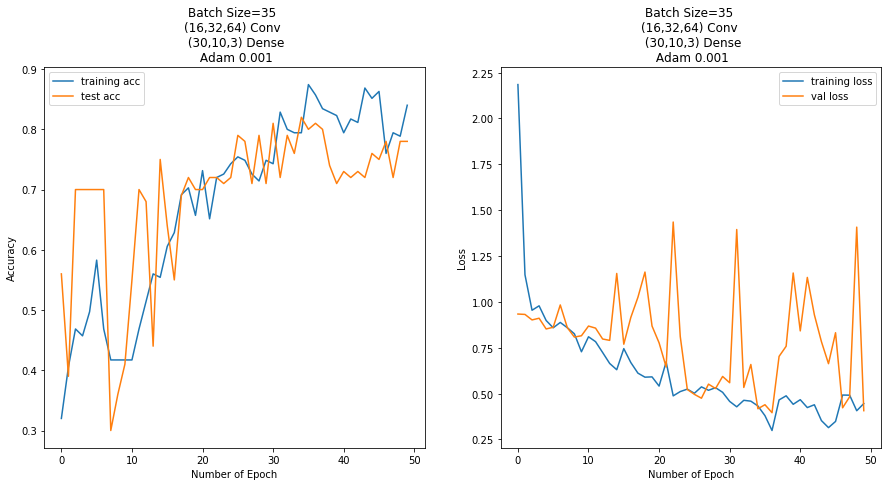

In [353]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.title('Batch Size=35 \n(16,32,64) Conv \n (30,10,3) Dense\n Adam 0.001')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')
plt.title('Batch Size=35 \n(16,32,64) Conv \n (30,10,3) Dense\n Adam 0.001')

In [354]:
i=0
loss=[]
acc=[]
while i<100:
    los,ac=model.evaluate_generator(test_gen)
    loss.append(los)
    acc.append(ac)
    i=i+1
    
print(sum(acc)/len(acc))
print(sum(loss)/len(loss))

0.8129999971389771
0.39004500687122345


0.8149999952316285

In [191]:
model.evaluate_generator(test_gen)

[0.3646857440471649, 0.8999999761581421]

In [192]:
model.save('C:\\Users\\PCPC\\Desktop\\Model\\Ripening\\Model_1_90P')

In [193]:
from keras.models import load_model
model1=load_model('C:\\Users\\PCPC\\Desktop\\Model\\Ripening\\Model_1_90P')

In [194]:
model1.evaluate_generator(test_gen)

[0.2802526354789734, 0.8999999761581421]

Text(0.5,1,'Batch Size=35 \n(16,32,64) Conv \n (30,10,3) Dense\n Adam 0.001')

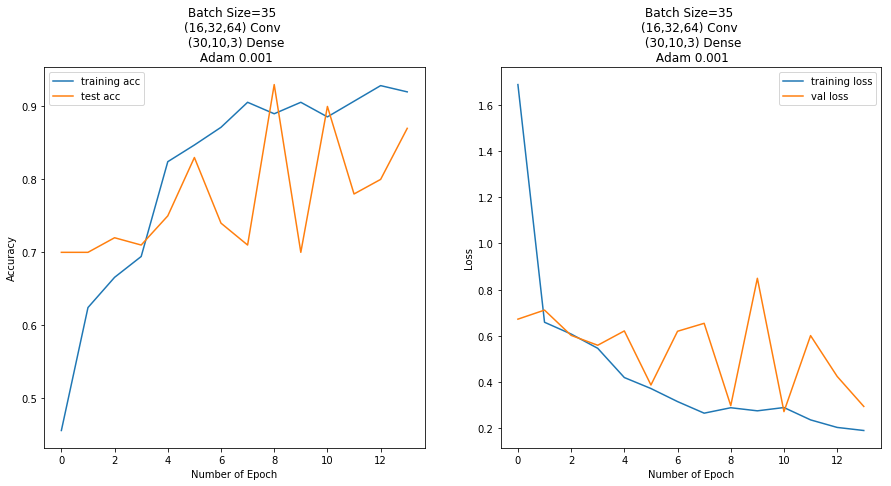

In [198]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.title('Batch Size=35 \n(16,32,64) Conv \n (30,10,3) Dense\n Adam 0.001')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')
plt.title('Batch Size=35 \n(16,32,64) Conv \n (30,10,3) Dense\n Adam 0.001')

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Text(0.5,1,'Batch Size=12 \n(32,64,128,256,512) Model\n Adam 0.001')

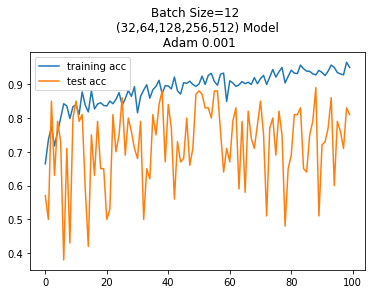

In [31]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.title('Batch Size=12 \n(32,64,128,256,512) Model\n Adam 0.001')

Text(0.5,1,'Batch Size=12 \n(32,64,128,256,512) Model\n Adam 0.001')

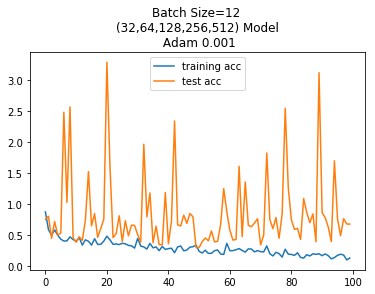

In [32]:
plt.plot(hist.history['loss'],label='training acc')
plt.plot(hist.history['val_loss'],label='test acc')
plt.legend()
plt.title('Batch Size=12 \n(32,64,128,256,512) Model\n Adam 0.001')

Text(0.5,1,'Batch Size=12 \n(32,64,128,256,512) Model\n Adam 0.001')

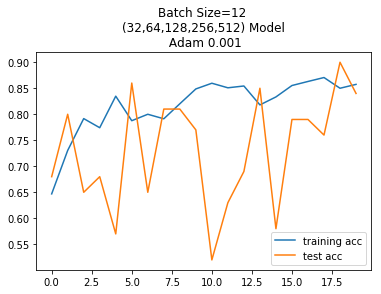

In [25]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.title('Batch Size=12 \n(32,64,128,256,512) Model\n Adam 0.001')

Text(0.5,1,'Batch Size=12 \n(32,64,128,256,512) Model\n SGD Optimizer')

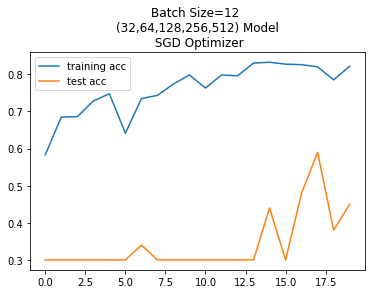

In [18]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.title('Batch Size=12 \n(32,64,128,256,512) Model\n SGD Optimizer')

Text(0.5,1,'Batch Size=12 \n(32,64,128,256,512) Model\n Adam Optimizer')

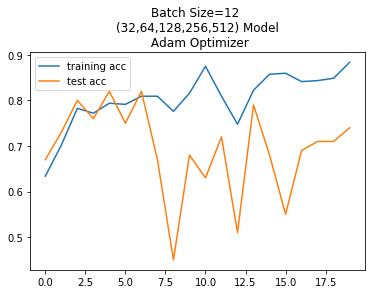

In [13]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.title('Batch Size=12 \n(32,64,128,256,512) Model\n Adam Optimizer')

Text(0.5,1,'Batch Size=12 \n(32,32,64,64) Model')

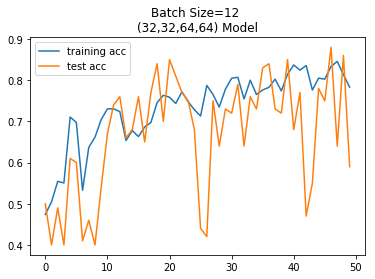

In [103]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.title('Batch Size=12 \n(32,32,64,64) Model')

Text(0.5,1,'Batch Size=6 \n(32,32,64,64,x64) Model')

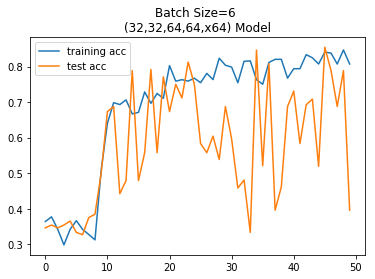

In [77]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.title('Batch Size=6 \n(32,32,64,64,x64) Model')

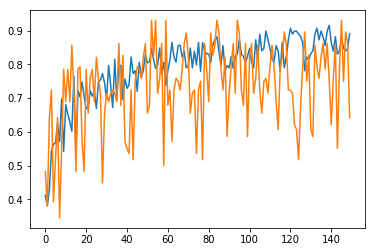

In [55]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')